<a href="https://colab.research.google.com/github/dagyeom23658/Python_Practice/blob/main/cnn_%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# N431 CNN

## 컨볼루션의 이해

In [1]:
# Conv2D함수 정의
def convolve2D(image, kernel, padding=0, strides=1):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

In [2]:
import sys
import requests
from io import BytesIO
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 회색스타일 이미지로 변경
response = requests.get("https://cdn.pixabay.com/photo/2017/08/31/09/40/singapore-2699987_1280.jpg")

In [3]:
https://pixabay.com/images/id-6748193/

SyntaxError: ignored

In [ ]:
# ★이걸로 그림을 못여는 이유는 뭐지? 픽사베이만 안되네. 일반 블로그 사진같은 건 가능.
ii = io.imread('https://cdn.pixabay.com/photo/2021/10/27/19/09/cat-6748193_960_720.jpg')
ii

In [5]:
response

<Response [200]>

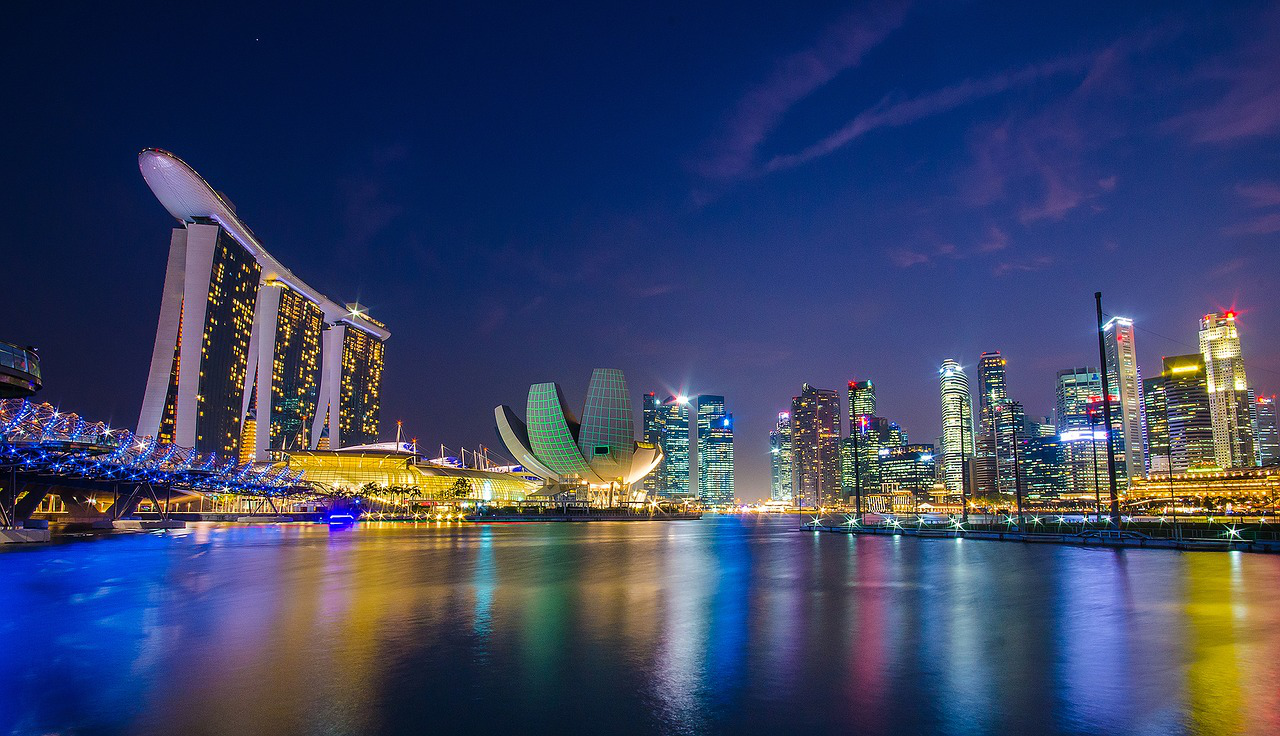

In [6]:
img = Image.open(BytesIO(response.content))
img

In [7]:
open_cv_image = np.array(img)
open_cv_image

array([[[  0,  14,  41],
        [  0,  14,  41],
        [  0,  14,  41],
        ...,
        [ 24,  35,  89],
        [ 25,  36,  90],
        [ 26,  37,  91]],

       [[  0,  14,  41],
        [  0,  14,  41],
        [  0,  14,  41],
        ...,
        [ 25,  36,  90],
        [ 25,  36,  90],
        [ 25,  36,  90]],

       [[  0,  14,  41],
        [  0,  14,  41],
        [  0,  14,  41],
        ...,
        [ 24,  35,  89],
        [ 24,  35,  89],
        [ 24,  35,  89]],

       ...,

       [[  1,  28, 133],
        [  2,  29, 134],
        [  3,  30, 135],
        ...,
        [168,  92,  78],
        [164,  86,  73],
        [157,  79,  66]],

       [[  2,  29, 132],
        [  4,  31, 134],
        [  4,  31, 136],
        ...,
        [165,  86,  73],
        [166,  87,  74],
        [159,  80,  67]],

       [[  1,  28, 131],
        [  4,  31, 134],
        [  4,  31, 136],
        ...,
        [162,  80,  68],
        [162,  80,  68],
        [161,  79,  67]]

In [8]:
open_cv_image.shape

(736, 1280, 3)

In [9]:
# 색상 공간 변환 함수
open_cv_image = cv2.cvtColor(src=open_cv_image, code=cv2.COLOR_BGR2GRAY)
open_cv_image

# 입력 이미지(src), 색상 변환 코드(code)
# BGR2GRAY는 Blue, Green, Red 채널 이미지를 단일 채널, 그레이스케일 이미지로 변경합니다.
# https://076923.github.io/posts/Python-opencv-10/
# https://bkshin.tistory.com/entry/OpenCV-7-%E3%85%87%E3%85%87

array([[20, 20, 20, ..., 50, 51, 52],
       [20, 20, 20, ..., 51, 51, 51],
       [20, 20, 20, ..., 50, 50, 50],
       ...,
       [56, 57, 58, ..., 96, 91, 84],
       [57, 59, 59, ..., 91, 92, 85],
       [56, 59, 59, ..., 86, 86, 85]], dtype=uint8)

In [10]:
open_cv_image.shape

(736, 1280)

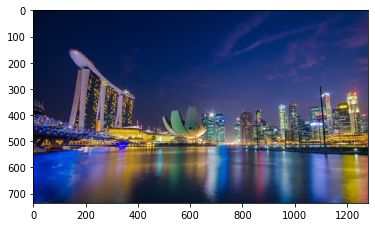

In [11]:
# original image
imgplot = plt.imshow(img)
plt.show()

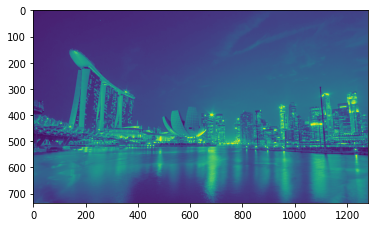

In [12]:
# transformed image
imgplot = plt.imshow(open_cv_image)
plt.show()

In [13]:
# Edge Detection Kernel
kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

In [14]:
# 이미지의 특징추출(필터를 적용해 합성곱을 한다.)
output = convolve2D(open_cv_image, kernel, padding=1)
output

array([[100.,  60.,  60., ..., 148.,   0.,   0.],
       [ 60.,   0.,   0., ...,   6.,   0.,   0.],
       [ 60.,   0.,   0., ...,  -6.,   0.,   0.],
       ...,
       [164.,  -1.,   2., ...,  52.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [15]:
# 이미지 저장
cv2.imwrite('2DConvolved.jpg', output)

True

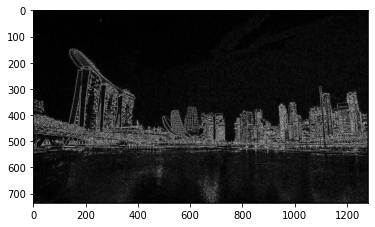

In [16]:
# 이미지 읽기
im = cv2.imread('2DConvolved.jpg')
imgplot = plt.imshow(im)
plt.show()

# 추출된 특징이 아래 그림. 여러가지의 커널필터를 이용해 여러 피쳐맵을 추출해서 그림의 특성을 파악할 수 있다. 

## 컨볼루션의 이해 - 버버리

In [17]:
import imageio
import matplotlib.pyplot as plt
from skimage import color, io
from skimage.exposure import rescale_intensity

# 이미지를 벡터로 반한
check = io.imread('https://assets.burberry.com/is/image/Burberryltd/0A0E4068-B7AE-4753-A989-EAD870D22DAA.jpg?$BBY_V2_ML_3x4$&wid=1278&hei=1700')


In [18]:
check

array([[[214, 214, 214],
        [214, 214, 214],
        [214, 214, 214],
        ...,
        [221, 221, 221],
        [221, 221, 221],
        [221, 221, 221]],

       [[214, 214, 214],
        [214, 214, 214],
        [214, 214, 214],
        ...,
        [221, 221, 221],
        [221, 221, 221],
        [221, 221, 221]],

       [[214, 214, 214],
        [214, 214, 214],
        [214, 214, 214],
        ...,
        [221, 221, 221],
        [221, 221, 221],
        [221, 221, 221]],

       ...,

       [[229, 229, 229],
        [229, 229, 229],
        [229, 229, 229],
        ...,
        [229, 229, 229],
        [229, 229, 229],
        [229, 229, 229]],

       [[229, 229, 229],
        [229, 229, 229],
        [229, 229, 229],
        ...,
        [229, 229, 229],
        [229, 229, 229],
        [229, 229, 229]],

       [[229, 229, 229],
        [229, 229, 229],
        [229, 229, 229],
        ...,
        [229, 229, 229],
        [229, 229, 229],
        [229, 229, 229]]

In [19]:
check.shape   #(깊이, 행의 길이, 열의 길이)

(1700, 1278, 3)

In [20]:
# color : 회색조 이미지의 RGB 표현을 만듭니다.
# https://scikit-image.org/docs/dev/api/skimage.color.html#skimage.color.gray2rgb
check_grayscale1 = color.rgb2gray(check)
check_grayscale1

array([[0.83921569, 0.83921569, 0.83921569, ..., 0.86666667, 0.86666667,
        0.86666667],
       [0.83921569, 0.83921569, 0.83921569, ..., 0.86666667, 0.86666667,
        0.86666667],
       [0.83921569, 0.83921569, 0.83921569, ..., 0.86666667, 0.86666667,
        0.86666667],
       ...,
       [0.89803922, 0.89803922, 0.89803922, ..., 0.89803922, 0.89803922,
        0.89803922],
       [0.89803922, 0.89803922, 0.89803922, ..., 0.89803922, 0.89803922,
        0.89803922],
       [0.89803922, 0.89803922, 0.89803922, ..., 0.89803922, 0.89803922,
        0.89803922]])

In [21]:
# rescale_intensity() : 강도 수준을 늘리거나 줄인 후 이미지를 반환
# ★이걸 굳이 해주는 이유는?
# https://scikit-image.org/docs/stable/api/skimage.exposure.html

check_grayscale = rescale_intensity(color.rgb2gray(check))
check_grayscale

array([[0.8446456 , 0.8446456 , 0.8446456 , ..., 0.87227419, 0.87227419,
        0.87227419],
       [0.8446456 , 0.8446456 , 0.8446456 , ..., 0.87227419, 0.87227419,
        0.87227419],
       [0.8446456 , 0.8446456 , 0.8446456 , ..., 0.87227419, 0.87227419,
        0.87227419],
       ...,
       [0.90384973, 0.90384973, 0.90384973, ..., 0.90384973, 0.90384973,
        0.90384973],
       [0.90384973, 0.90384973, 0.90384973, ..., 0.90384973, 0.90384973,
        0.90384973],
       [0.90384973, 0.90384973, 0.90384973, ..., 0.90384973, 0.90384973,
        0.90384973]])

In [22]:
check_grayscale.shape  #행열순

(1700, 1278)

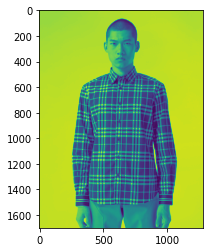

In [23]:
plt.imshow(check_grayscale1)

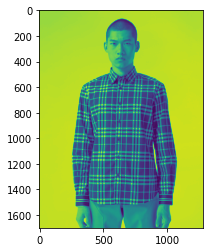

In [24]:
plt.imshow(check_grayscale)

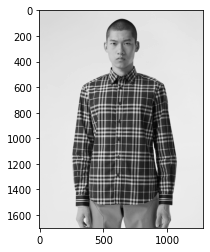

In [25]:
plt.imshow(check_grayscale, cmap="gray");

In [26]:
import numpy as np
import scipy.ndimage as nd

# 가로 가중치주는 컨볼루션 필터 생성
horizontal_edge_convolution = np.array([[1,1,1,1,],
                                        [0,0,0,0],
                                        [0,0,0,0],
                                        [-1,-1,-1,-1]])

# 세로 강조하는 컨볼루션 필터 생성
vertical_edge_convolution = np.array([[1, 0, 0, 0, -1],
                                     [1, 0, 0, 0, -1],
                                     [1, 0, 0, 0, -1],
                                     [1, 0, 0, 0, -1],
                                     [1, 0, 0, 0, -1]])


In [27]:
# nd.convolve : 배열은 주어진 커널로 컨볼루션됩니다.(input, weights)

check_edges_vert = nd.convolve(check_grayscale, vertical_edge_convolution, mode='constant', cval=0.0)  
check_edges_vert


#https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html
# ★ mode='constant', cval=0.0 --> 이게 뭔가요?

# ★ 컨볼루션하면 외곽사이즈가 하나씩 줄어야 되는 것 아닌가? 왜 shape은 그대로지?

array([[ 2.53393679,  2.53393679,  0.        , ...,  0.        ,
        -2.61682258, -2.61682258],
       [ 3.37858239,  3.37858239,  0.        , ...,  0.        ,
        -3.48909677, -3.48909677],
       [ 4.22322799,  4.22322799,  0.        , ...,  0.        ,
        -4.36137096, -4.36137096],
       ...,
       [ 4.51924864,  4.51924864,  0.        , ...,  0.        ,
        -4.51924864, -4.51924864],
       [ 3.61539892,  3.61539892,  0.        , ...,  0.        ,
        -3.61539892, -3.61539892],
       [ 2.71154919,  2.71154919,  0.        , ...,  0.        ,
        -2.71154919, -2.71154919]])

In [28]:
check_edges_vert.shape

(1700, 1278)

(1700, 1278)


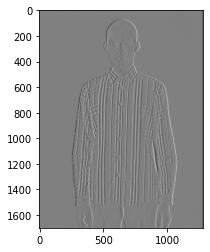

In [29]:
print(check_edges_vert.shape)
plt.imshow(check_edges_vert, cmap="gray");

In [30]:
check_edges_horz = nd.convolve(check_grayscale, horizontal_edge_convolution, mode='reflect')  # reflect는 기본값
check_edges_horz

array([[ 2.22044605e-16,  2.22044605e-16,  2.22044605e-16, ...,
         2.22044605e-16,  2.22044605e-16,  2.22044605e-16],
       [ 2.22044605e-16,  2.22044605e-16,  2.22044605e-16, ...,
         2.22044605e-16,  2.22044605e-16,  2.22044605e-16],
       [ 2.22044605e-16,  2.22044605e-16,  2.22044605e-16, ...,
         2.22044605e-16,  2.22044605e-16,  2.22044605e-16],
       ...,
       [-2.22044605e-16, -2.22044605e-16, -2.22044605e-16, ...,
        -2.22044605e-16, -2.22044605e-16, -2.22044605e-16],
       [-2.22044605e-16, -2.22044605e-16, -2.22044605e-16, ...,
        -2.22044605e-16, -2.22044605e-16, -2.22044605e-16],
       [-2.22044605e-16, -2.22044605e-16, -2.22044605e-16, ...,
        -2.22044605e-16, -2.22044605e-16, -2.22044605e-16]])

(1700, 1278)


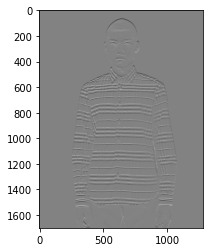

In [31]:
print(check_edges_horz.shape)
plt.imshow(check_edges_horz, cmap="gray");

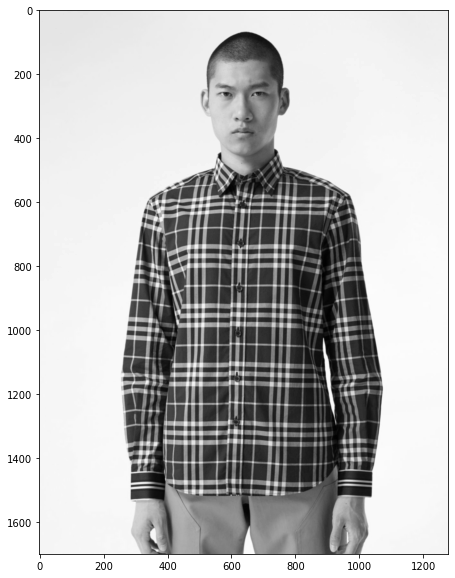

In [32]:
ones_convolution = np.array([[1, 1, 1],
                              [1, 1, 1],
                              [1, 1, 1]])
check_ones = nd.convolve(check_grayscale, ones_convolution)
plt.figure(figsize=(30,10))
plt.imshow(check_ones, cmap="gray")

In [33]:
plt.figure(figsize=(30,10))  # 이미지 사이즈 지정.

labels = ["Horizontal Edges", "Original", "Ones Filter", "Vertical Edges"]
images = [check_edges_horz, check_grayscale, check_ones, check_edges_vert]

i = 0
for label, image in zip(labels, images):

    plt.subplot(1,4,i+1)  #row, column, index 순.
    plt.grid(False)
    plt.imshow(image, cmap="gray")
    plt.title(label)
    i += 1 

plt.show()

SyntaxError: ignored

In [34]:
plt.subplot(1,4,5)

ValueError: ignored

<Figure size 432x288 with 0 Axes>

In [36]:
i = 0
for label, image in zip(labels, images):

    plt.subplot(1,4,i+1)
    plt.grid(False)
    plt.imshow(image, cmap="gray")
    plt.title(label)
    i += 1 

plt.show()

NameError: ignored

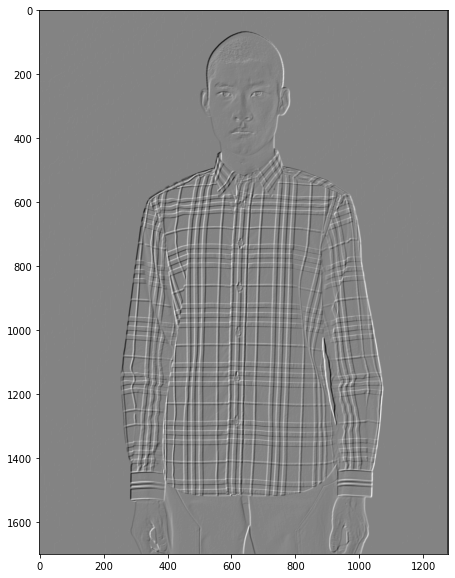

In [37]:
# combine vertical and horizontal edges
combined = check_edges_horz + check_edges_vert
plt.figure(figsize=(30,10))
plt.imshow(combined, cmap="gray")

In [38]:
# 맥스풀링으로 특징 추출
from skimage.measure import block_reduce

reduced = block_reduce(combined, (2,2), np.max)
reduced

array([[ 3.37858239e+00,  2.22044605e-16,  2.22044605e-16, ...,
         2.22044605e-16,  2.22044605e-16, -2.61682258e+00],
       [ 4.22322799e+00,  2.22044605e-16,  2.22044605e-16, ...,
         2.22044605e-16,  2.22044605e-16, -4.36137096e+00],
       [ 4.22322799e+00,  2.22044605e-16,  2.22044605e-16, ...,
         2.22044605e-16,  2.22044605e-16, -4.36137096e+00],
       ...,
       [ 4.51924864e+00, -2.22044605e-16, -2.22044605e-16, ...,
         2.76285943e-02, -2.22044605e-16, -4.51924864e+00],
       [ 4.51924864e+00, -2.22044605e-16, -2.22044605e-16, ...,
         3.55224784e-02, -2.22044605e-16, -4.51924864e+00],
       [ 3.61539892e+00, -2.22044605e-16, -2.22044605e-16, ...,
         3.15755364e-02, -2.22044605e-16, -2.71154919e+00]])

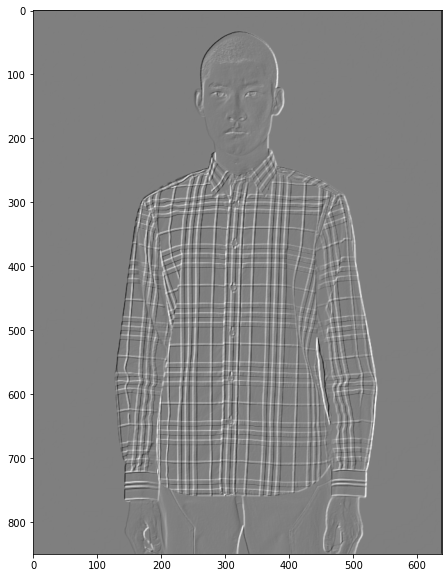

In [39]:
plt.figure(figsize=(30,10))
plt.imshow(reduced, cmap="gray");

In [40]:
print(check_grayscale.shape)
print(combined.shape)
print(reduced.shape)

(1700, 1278)
(1700, 1278)
(850, 639)


## tensorflow.keras - Cifar 10 실습

In [41]:
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential, Model # <- May Use
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170508288/170498071 [==============================] - 11s 0us/step


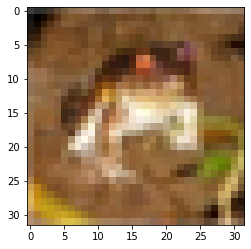

In [42]:
plt.imshow(train_images[0])

In [43]:
train_labels[0]

array([6], dtype=uint8)

In [44]:
train_labels[0][0]

6

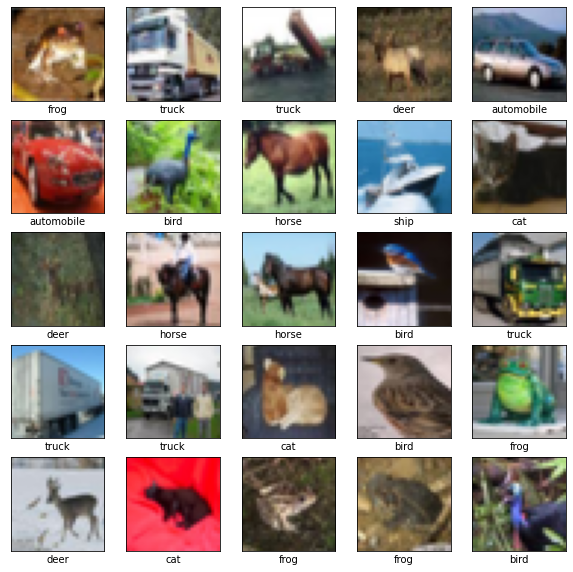

In [45]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)  # 컬러맵 : https://matplotlib.org/stable/tutorials/colors/colormaps.html
    plt.xlabel(class_names[train_labels[i][0]])

plt.show()


# ★ 여기서 cmap=plt.cm.binary 의 역할은 뭐지?

In [46]:
train_images[0].shape

(32, 32, 3)

In [47]:
# 아키텍쳐 만들기
# Conv2D(컨볼루션필터 갯수(임의지정), 필터사이즈(행,열), input_shape=(행,열,색상/흑백), 활성화함수) 순서로.
# MaxPooling2D(풀링필터 크기) --> pool_size=2라고 정해줄 수도 있음. 2면 전체사이즈가 절반드로 줄어든다. 
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [48]:
# 모델학습방식을 정의함
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [49]:
# 모델 학습시키기
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 73s 46ms/step - loss: 1.5056 - accuracy: 0.4497 - val_loss: 1.2835 - val_accuracy: 0.5430
Epoch 2/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.1602 - accuracy: 0.5888 - val_loss: 1.1289 - val_accuracy: 0.5997
Epoch 3/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.0274 - accuracy: 0.6363 - val_loss: 1.0347 - val_accuracy: 0.6428
Epoch 4/10
1563/1563 [==============================] - 70s 44ms/step - loss: 0.9391 - accuracy: 0.6695 - val_loss: 0.9623 - val_accuracy: 0.6660
Epoch 5/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.8663 - accuracy: 0.6975 - val_loss: 0.9682 - val_accuracy: 0.6665
Epoch 6/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.8167 - accuracy: 0.7117 - val_loss: 0.9381 - val_accuracy: 0.6761
Epoch 7/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.7681 - accuracy: 0.7298 - val_loss: 0.9008 -

In [50]:
# 수행
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 3s - loss: 0.8739 - accuracy: 0.7134


## 전이학습 (Transfer Learning)
1. 파라미터 포함한 레이어 가져오기
2. 이전 학습 모델에서 정보를 동결한다.(가중치 업뎃 x)
3. 동결된 층 위에 새로운 층을 더한다. : 출력층(output)의 수를 조절하여 새로운 데이터셋에서 원하는 예측방법(분류, 회귀 등)으로 전환
4. 새로운 데이터셋에서 새로 추가한 계층만을 학습

https://keras.io/api/applications/

★ : 렉쳐노트 예시가 실행이 안됨.

In [51]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
# 클래스의 개수 정의 : Cats & Dogs 
NUM_CLASSES = 2

# 입력 이미지의 차원 수 : RGB
CHANNELS = 3
# 학습된 네트워크 특징
IMAGE_RESIZE = 224
RESNET50_POOLING_AVERAGE = 'avg'
DENSE_LAYER_ACTIVATION = 'softmax'
OBJECTIVE_FUNCTION = 'categorical_crossentropy'

# 출력 Metric
LOSS_METRICS = ['accuracy']

# EARLY_STOP_PATIENCE < NUM_EPOCHS
NUM_EPOCHS = 10
EARLY_STOP_PATIENCE = 3

# These steps value should be proper FACTOR of no.-of-images in train & valid folders respectively
# Training images processed in each step would be no.-of-train-images / STEPS_PER_EPOCH_TRAINING
STEPS_PER_EPOCH_TRAINING = 10
STEPS_PER_EPOCH_VALIDATION = 10

# These steps value should be proper FACTOR of no.-of-images in train & valid folders respectively
# NOTE that these BATCH* are for Keras ImageDataGenerator batching to fill epoch step input
BATCH_SIZE_TRAINING = 100
BATCH_SIZE_VALIDATION = 100

# 테스트 배치의 개수
BATCH_SIZE_TESTING = 1

In [58]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

# 모델제작, 이진분류
model = Sequential()
model.add(ResNet50(include_top = False, pooling = 'avg'))
model.add(Dense(2,activation = 'softmax')) 

# 이미 학습된 영역은 학습하지 않음
model.layers[0].trainable = False

In [56]:
# 모델 구조
model.summary()

# https://stackoverflow.com/questions/56004412/converting-keras-applications-resnet50-to-a-sequential-gives-error
# https://gywns6287.github.io/posts/PIGSE/

ValueError: ignored

In [60]:
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50

height = 100 #dimensions of image
width = 100
channel = 3 #RGB
  
# Create pre-trained ResNet50 without top layer
model_resnet = ResNet50(include_top=False, weights="imagenet", input_shape=(height, width, channel))

In [62]:
conv1 = Conv2D(32, (3,3), activation = 'relu')(model_resnet.output)
pool1 = MaxPooling2D(2,2)(conv1)
# bn1 = BatchNormalization(axis=chanDim)(pool1)
# drop1 = Dropout(0.2)(bn1)

flatten1 = Flatten()(pool1)
fc2 = Dense(classes, activation='softmax')(flatten1)

model = Model(inputs=model_resnet.input, outputs=fc2)

NameError: ignored